In [2]:
import SimpleITK as sitk
import numpy as np

In [84]:
mask_img = sitk.ReadImage("/mnt/tmp/2/12310425_C2_mask.nii.gz")
mask = sitk.GetArrayFromImage(mask_img)
c0_img = sitk.ReadImage("/mnt/tmp/2/12310425_C0.nii.gz")
c0 = sitk.GetArrayFromImage(c0_img)
c2_img = sitk.ReadImage("/mnt/tmp/2/12310425_C2.nii.gz")
c2 = sitk.GetArrayFromImage(c2_img)
c5_img = sitk.ReadImage("/mnt/tmp/2/12310425_C5.nii.gz")
c5 = sitk.GetArrayFromImage(c5_img)

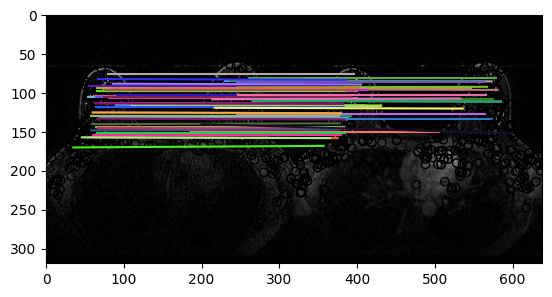

In [24]:
import matplotlib.pyplot as plt

from skimage import data
from skimage import transform
from skimage.color import rgb2gray
from skimage.feature import match_descriptors, plot_matches, SIFT

img1 = c0[75, :, :]
img2 = c2[75, :, :]

img1 = (img1 - img1.min()) / (img1.max() - img1.min())
img2 = (img2 - img2.min()) / (img2.max() - img2.min())

descriptor_extractor = SIFT()

descriptor_extractor.detect_and_extract(img1)
keypoints1 = descriptor_extractor.keypoints
descriptors1 = descriptor_extractor.descriptors

descriptor_extractor.detect_and_extract(img2)
keypoints2 = descriptor_extractor.keypoints
descriptors2 = descriptor_extractor.descriptors


matches12 = match_descriptors(descriptors1, descriptors2, max_ratio=0.6,
                              cross_check=True)


plot_matches(plt, img1, img2, keypoints1, keypoints2, matches12)
plt.show()

In [38]:
import cv2

H, status = cv2.findHomography(keypoints2[matches12[:, 1]], keypoints1[matches12[:, 0]], cv2.RANSAC,5.0)

In [53]:
# Apply the transformation
height, width = img2.shape[:2]
c2_reg = cv2.warpPerspective(img2, H, (width, height))

In [54]:
import monai

In [72]:
# 提取梯度图
gra_filter = sitk.SobelEdgeDetectionImageFilter()
sobel_data = gra_filter.Execute(c2_img)
sobel_data = sitk.Cast(sobel_data, sitk.sitkInt16)
x = sitk.GetArrayFromImage(sobel_data)

In [83]:
sitk.WriteImage(sobel_data, "/mnt/tmp/2/12310425_C2_sobel.nii.gz")
sitk.WriteImage(gra_filter.Execute(sitk.Cast(c0_img, sitk.sitkFloat32)), "/mnt/tmp/2/12310425_C0_sobel.nii.gz")
sitk.WriteImage(gra_filter.Execute(sitk.Cast(c5_img, sitk.sitkFloat32)), "/mnt/tmp/2/12310425_C5_sobel.nii.gz")
sitk.WriteImage(gra_filter.Execute(sitk.Cast(mask_img, sitk.sitkFloat32)), "/mnt/tmp/2/12310425_mask_sobel.nii.gz")
# sitk.WriteImage(gra_filter.Execute(sitk.Cast(sobel_data, sitk.sitkFloat32)), "/mnt/tmp/2/12310425_C2_sobel_sobel.nii.gz")

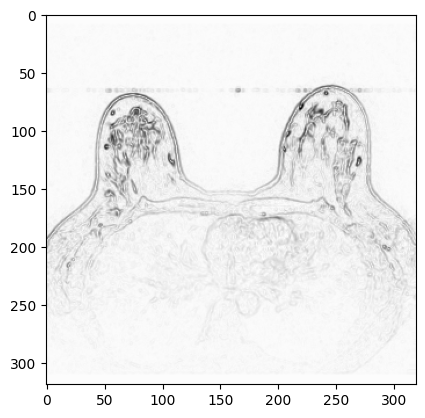

In [74]:
sitk.WriteImage(gra_filter.Execute(sitk.Cast(c0_img, sitk.sitkFloat32)), "/mnt/tmp/2/12310425_C0_sobel.nii.gz")